# Non Linear Regression

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Various types of plots:

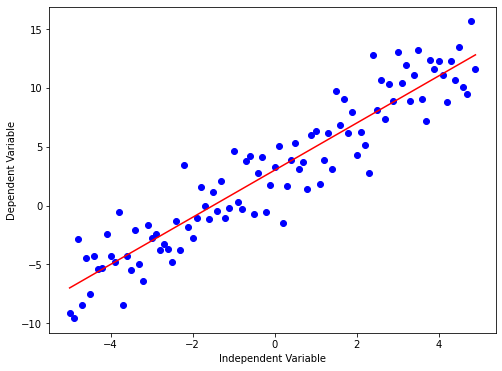

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regression is a method to model the non-linear relationship between the independent variables $x$ and the dependent variable $y$. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$).  For example:

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example: $$ y = \log(x)$$

We can have a function that's even more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$


Let's take a look at a cubic function's graph.


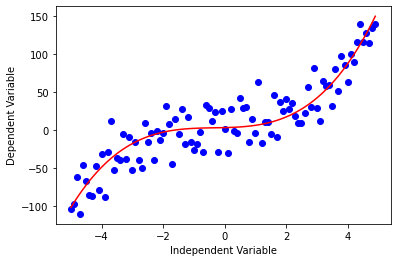

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*(x) + 3
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

Some other types of non-linear functions are:


### Quadratic

$$ Y = X^2 $$


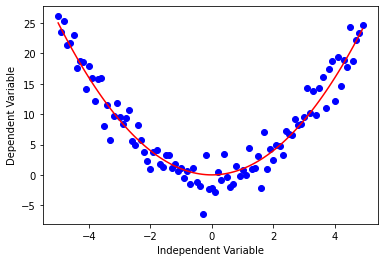

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x, 2)
y_noise = 2 * np.random.normal(size = x.size)
y_data = y + y_noise
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

### Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.


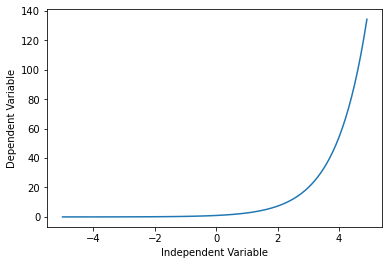

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)
plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

### Logarithmic

The response $y$ is a results of applying the logarithmic map from the input $x$ to the output $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be a polynomial representation of the $x$ values. In general form it would be written as\
\begin{equation}
y = \log(X)
\end{equation}


C:\Users\Sahil\AppData\Local\Temp\ipykernel_16392\4052972806.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


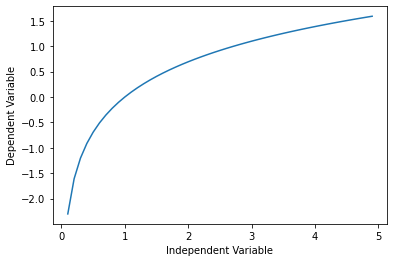

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X, Y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()


### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

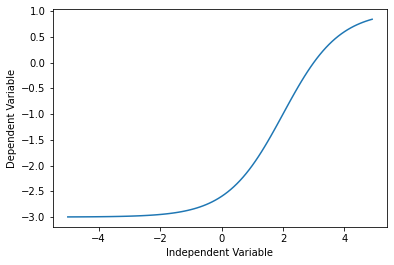

In [7]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X, Y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

<a id="ref2"></a>

# Non-Linear Regression example


For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.


In [8]:
path = 'https://raw.githubusercontent.com/jishubasak/Regression-Models/master/china_gdp.csv'

df = pd.read_csv(path)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.


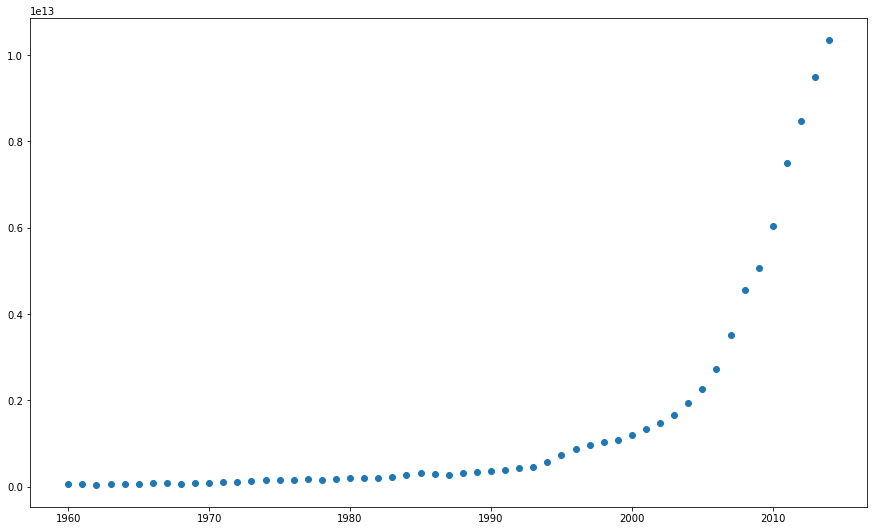

In [11]:
plt.figure(figsize=(15, 9))
plt.scatter(df["Year"], df["Value"])
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


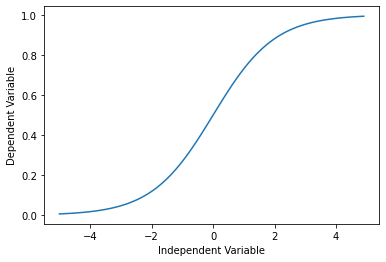

In [20]:
X = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters.


In [21]:
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1*(x - beta_2)))
    return y

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [24]:
df["Year"] = df["Year"] / max(df["Year"])
df["Value"] = df["Value"] /max(df["Value"])
df.head()

,Year,Value
0,0.973188,0.005716
1,0.973684,0.004786
2,0.974181,0.004509
3,0.974677,0.004838
4,0.975174,0.005704


#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


In [27]:
from scipy.optimize import curve_fit

popt, pcuv = curve_fit(sigmoid, df["Year"], df["Value"])
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


Now we plot our resulting regression model.

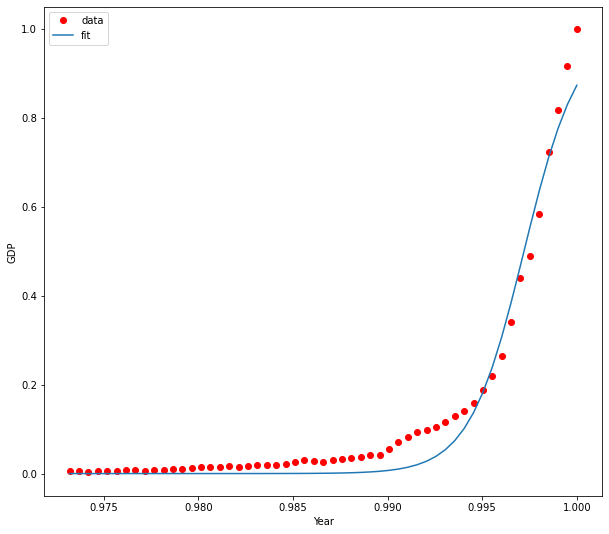

In [46]:
plt.figure(figsize=(10, 9))
y = sigmoid(df["Year"], popt[0], popt[1])
plt.plot(df["Year"], df["Value"], 'ro', label = 'data')
plt.plot(df["Year"], y, label = 'fit')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Practice

Can you calculate what is the accuracy of our model?


In [47]:
from sklearn.model_selection import train_test_split

# Spliting the data into train test split
x_data = df["Year"]
y_data = df["Value"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

#Building model using curve_fit
popt, pcuv = curve_fit(sigmoid, x_train, y_train)

# Predicting the test
yhat = sigmoid(x_test, popt[0], popt[1])

# Evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_test, yhat) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
